<a href="https://colab.research.google.com/github/Tienspkt/AI_20146196_Le-Minh-Tien/blob/main/Cuoiky_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale = 1./255)

training_set=train_data.flow_from_directory('/content/drive/MyDrive/dataAIck/Data/train',target_size=(300,300), batch_size=32, class_mode='categorical')
test_set=test_data.flow_from_directory('/content/drive/MyDrive/dataAIck/Data/Validation',target_size=(300,300 ), batch_size=32, class_mode='categorical')
     
training_set.class_indices
test_set.class_indices

Found 630 images belonging to 3 classes.
Found 178 images belonging to 3 classes.


{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#tạo mô hình CNN sủ dụng tuần tự
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization                               #dense :full conected ANN
from keras.layers import LeakyReLU
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(300,300,3),padding = 'same'))          #32 lần tích chập đầu tiên
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(512,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(1024,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(1024,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(3,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 300, 300, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                    

In [ ]:
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(training_set, epochs= 10 , batch_size= 1024 ,verbose= 1)
test_loss,test_acc = model.evaluate(training_set)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)

Epoch 1/10
161/161 [==============================] - 2998s 18s/step - loss: 1.0669 - accuracy: 0.6656
Epoch 2/10
161/161 [==============================] - 234s 1s/step - loss: 0.4367 - accuracy: 0.8243
Epoch 3/10
161/161 [==============================] - 232s 1s/step - loss: 0.3286 - accuracy: 0.8758
Epoch 4/10
161/161 [==============================] - 230s 1s/step - loss: 0.2876 - accuracy: 0.8913
Epoch 5/10
161/161 [==============================] - 229s 1s/step - loss: 0.2505 - accuracy: 0.9059
Epoch 6/10
161/161 [==============================] - 229s 1s/step - loss: 0.2325 - accuracy: 0.9170
Epoch 7/10
161/161 [==============================] - 230s 1s/step - loss: 0.1872 - accuracy: 0.9347
Epoch 8/10
161/161 [==============================] - 231s 1s/step - loss: 0.2262 - accuracy: 0.9207
Epoch 9/10
161/161 [==============================] - 230s 1s/step - loss: 0.1753 - accuracy: 0.9335
Epoch 10/10
161/161 [==============================] - 228s 1s/step - loss: 0.1313 - accu

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
#Lưu
from keras.models import load_model
model.save("Cuoiky_Covid19.h5")
model_1=load_model('Cuoiky_Covid19.h5')

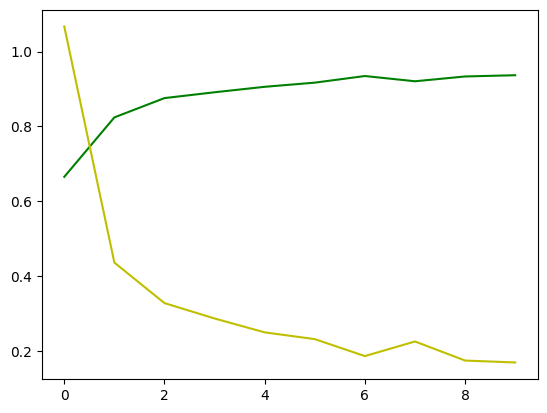

In [ ]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']    # VẼ ĐỒ THỊ SỬ MẤT MÁT VÀ ĐỘ HỌC TẬP CHÍNH XÁC CỦA BÀI KIỂM TRA
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.show()

NameError: ignored

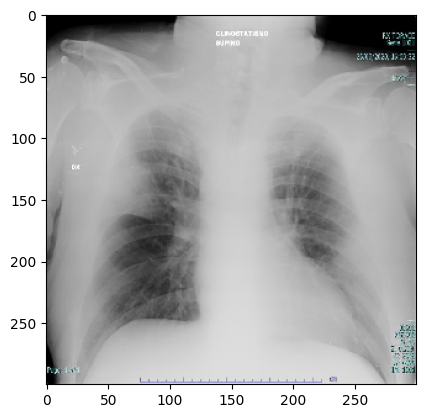

In [ ]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
import matplotlib.pyplot as plt 
test='/content/1(1).jpg'


img=load_img(test,target_size=(300,300))
plt.imshow(img)
img=img_to_array(img) 
img=img.astype('float32') 
img=img/255 
img=np.expand_dims(img,axis=0)
result=(model_1.predict(img).argmax()) 
class_name=['100K','10K','lK','200K','200dong', '20K','2K','500K','500dong','50K','5K']
print(class_name[result]) 
plt.show()